In [1]:
from pygam import LinearGAM, s, f, l
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

In [2]:
covariates = ['Shops', 'ATMs', 'Downtown', 'Workday', 'Center', 'High']
df = pd.read_csv('ATM_sample.csv')
filtered_df = df.dropna(subset = covariates + ['Withdraw'])

#separating response and predictors
y = filtered_df['Withdraw']
X = filtered_df[covariates]
X = X.astype(float)
X_orig = X.copy()

100% (10 of 10) |########################| Elapsed Time: 0:00:02 Time:  0:00:020:00
100% (10 of 10) |########################| Elapsed Time: 0:00:02 Time:  0:00:020:00
100% (10 of 10) |########################| Elapsed Time: 0:00:02 Time:  0:00:020:00
100% (10 of 10) |########################| Elapsed Time: 0:00:02 Time:  0:00:020:00
100% (10 of 10) |########################| Elapsed Time: 0:00:02 Time:  0:00:020:00


 Average Test MSE: 6.2040642846933185
 Standard Dev. of Test MSE: 0.22963219539900143
 Test MSE values: [6.132363156254177, 5.926876082347895, 6.499944300523169, 6.445894738322038, 6.015243146019316]
 Min Test MSE: 5.926876082347895
 Optimal Lambda: [[4.641588833612772], [4.641588833612772], [4.641588833612772], [4.641588833612772], [4.641588833612772]]
[[[4.641588833612772], [4.641588833612772], [4.641588833612772], [4.641588833612772], [4.641588833612772]], [[4.641588833612772], [4.641588833612772], [4.641588833612772], [4.641588833612772], [4.641588833612772]], [[4.641588833612772], [4.641588833612772], [4.641588833612772], [4.641588833612772], [4.641588833612772]], [[4.641588833612772], [4.641588833612772], [4.641588833612772], [4.641588833612772], [4.641588833612772]], [[4.641588833612772], [4.641588833612772], [4.641588833612772], [4.641588833612772], [4.641588833612772]]]


<Figure size 640x480 with 0 Axes>

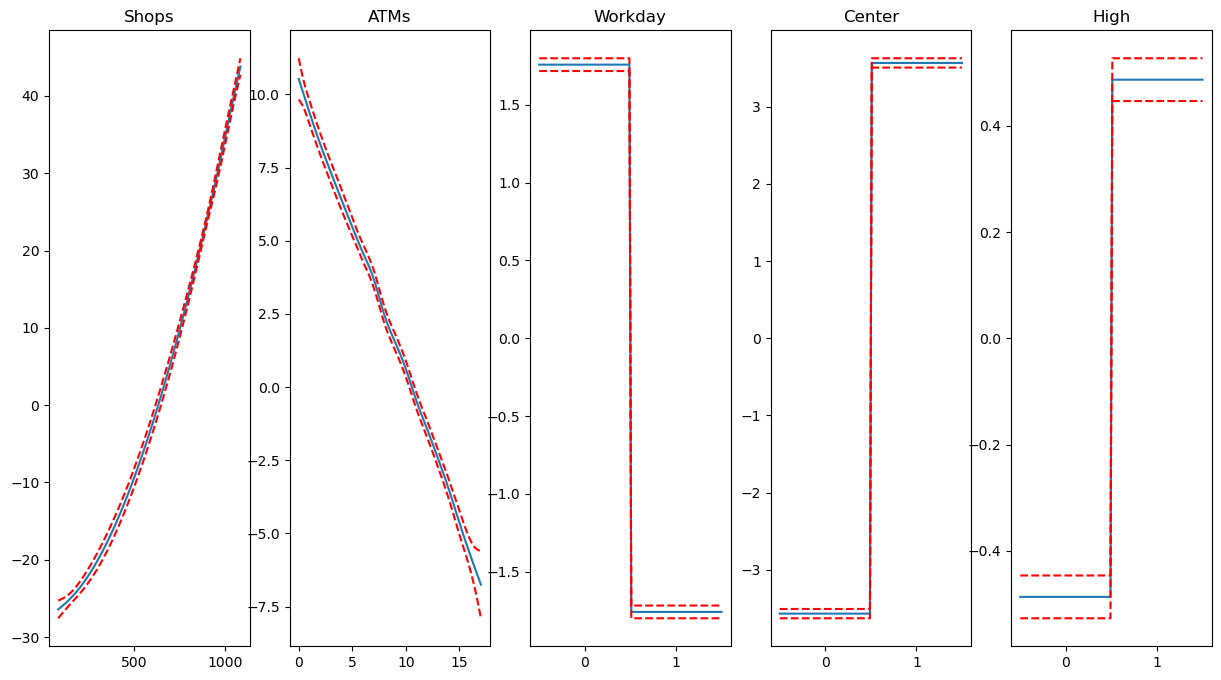

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                      22.198
Link Function:                     IdentityLink Log Likelihood:                                -49808.3288
Number of Samples:                        17600 AIC:                                            99663.0536
                                                AICc:                                           99663.1175
                                                GCV:                                                6.2547
                                                Scale:                                              6.2405
                                                Pseudo R-Squared:                                   0.9901
Feature Function                  Lam

C:\Users\Lily\AppData\Local\Temp\ipykernel_7496\1944865539.py:43: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam.summary()


In [3]:
#gam modelling
covariates = ['Shops', 'ATMs', 'Workday', 'Center', 'High'] #removed downtown due to multicollinearity
y = filtered_df['Withdraw']
X = filtered_df[covariates]
X = X.astype(float)

lambda_vals = np.logspace(-6, 6, 10)
X_np = X.to_numpy()

kf = KFold(n_splits = 5, shuffle = True, random_state = 42)
test_mse_list = []
gam_lambdas = []

#cv loop
for train_index, test_index in kf.split(X):
    X_train, X_test = X_np[train_index], X_np[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    gam = LinearGAM(s(0) + s(1) + f(2) + f(3) + f(4))
    gam.gridsearch(X_train, y_train, lam = lambda_vals)

    y_pred = gam.predict(X_test)
    mse_fold = np.mean((y_test - y_pred)**2)
    test_mse_list.append(mse_fold)
    gam_lambdas.append(gam.lam)

test_mse_array = np.array(test_mse_list)
print(f' Average Test MSE: {test_mse_array.mean()}')
print(f' Standard Dev. of Test MSE: {test_mse_array.std()}')
print(f' Test MSE values: {test_mse_list}')
print(f' Min Test MSE: {min(test_mse_list)}')
print(f' Optimal Lambda: {min(gam_lambdas)}')
print(gam_lambdas)

#plotting partial dependence graphs
plt.figure();
fig, axs = plt.subplots(1, 5, figsize = (15, 8));
for i, ax in enumerate(axs):
    XX = gam.generate_X_grid(term = i)
    ax.plot(XX[:, i], gam.partial_dependence(term = i, X = XX))
    ax.plot(XX[:, i], gam.partial_dependence(term = i, X = XX, width = 0.95)[1], c = 'r', ls = '--')
    ax.set_title(covariates[i])
plt.show()

gam.summary()